<a href="https://colab.research.google.com/github/MichaelNovandoNapitupulu/Data-Mining/blob/main/Tugas_10_Data_Mining_A11_2022_14452_Michael_Novando_Napitupulu__py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
dataset = pd.read_csv('konsumen.csv')

In [8]:
print("Kolom Dataset:")
print(dataset.keys())

Kolom Dataset:
Index(['Gaji', 'Pengeluaran'], dtype='object')


In [9]:
print("\nData Awal:")
print(dataset.head())


Data Awal:
   Gaji  Pengeluaran
0  2500         1750
1  3800         4200
2  3900         3800
3  4350         5500
4  4400         3200


In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

In [11]:
wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

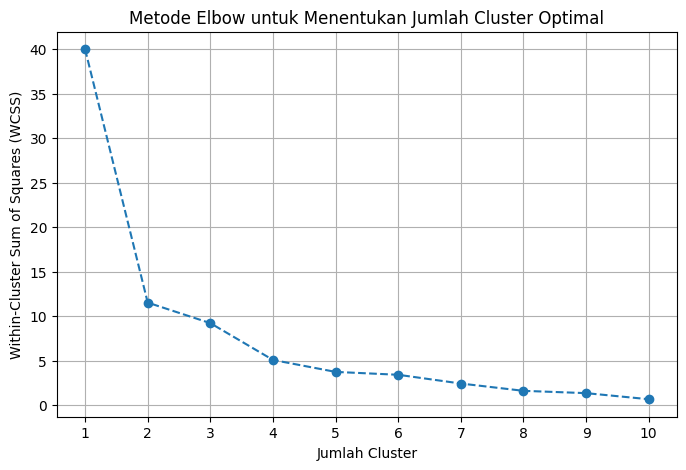

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [13]:
n_clusters = 3  # Ubah sesuai hasil Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [14]:
dataset['Cluster'] = clusters

In [15]:
print("\nData dengan Cluster:")
print(dataset.head())


Data dengan Cluster:
   Gaji  Pengeluaran  Cluster
0  2500         1750        2
1  3800         4200        0
2  3900         3800        0
3  4350         5500        0
4  4400         3200        0


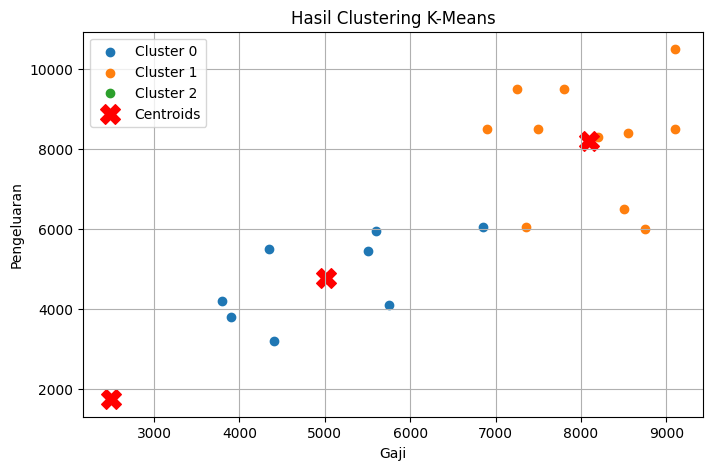

In [16]:
plt.figure(figsize=(8, 5))
for cluster in range(n_clusters):
    cluster_data = dataset[dataset['Cluster'] == cluster]
    plt.scatter(cluster_data['Gaji'], cluster_data['Pengeluaran'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', marker='X', label='Centroids')

plt.title('Hasil Clustering K-Means')
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.legend()
plt.grid()
plt.show()